[View in Colaboratory](https://colab.research.google.com/github/awenare/Fraud-Detection/blob/master/Fraud_Detection_Project_Tina_Kovacova.ipynb)

## Click Fraud Detection - Talking Data

**OVERVIEW: **

The objective is to predict whether a user will download an app after clicking a mobile app advertisement, as well as to discover fradulent clicks on ads. 

TalkingData, China’s largest independent big data service platform, covers over **70% of active mobile devices nationwide**. They handle **3 billion clicks per day, of which 90% are potentially fraudulent**. Their current approach to prevent click fraud for app developers is to **measure the journey of a user’s click across their portfolio, and flag IP addresses who produce lots of clicks, but never end up installing apps**. With this information, they've built an IP blacklist and device blacklist.

Methodology for Kaggle competition: [Area under the ROC Curve](https://en.wikipedia.org/wiki/Receiver_operating_characteristic)

<br>

**FINDINGS: **


*   Out of the 100,000 samples in the test file, only 34,857 IP addresses are unique
*   The list contains 161 apps installed on 100 types of devices using 130 different OS variants


<br>



**ISSUE TRACKER: **

✅ GitHub limits file upload to 100MB

⚠️ Git push/pull issues

⚠️ How to import dataset directly from HDD to colab?

⚠️ Upload to Google Drive (see old tutorials) for the 7+ GB full training data file

⚠️ How to do sorted count of the data by columns?

⚠️ Visualization for the data with no categorical labels (i.e. app name, device type, OS)

⚠️ 



📌 STRETCH: Process this in Spark

### I. Loading the Dataset & Treating Data

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
data_sample = pd.read_csv('https://raw.githubusercontent.com/awenare/Fraud-Detection/master/train_sample.csv')

In [4]:
data_sample.head(5)

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0


In [5]:
data_sample.shape

(100000, 8)

#### Data Cleanup

In [6]:
# Identifying NaNs

pd.isnull(data_sample).sum()


ip                     0
app                    0
device                 0
os                     0
channel                0
click_time             0
attributed_time    99773
is_attributed          0
dtype: int64

In [7]:
# ⬇️ refactor with a pretty FOR loop?

pd.unique(data_sample['ip']).shape

(34857,)

In [8]:
pd.unique(data_sample['app']).shape

(161,)

In [9]:
pd.unique(data_sample['device']).shape

(100,)

In [10]:
pd.unique(data_sample['os']).shape

(130,)

In [11]:
pd.unique(data_sample['channel']).shape

(161,)

In [12]:
# Click time may or may not be potentially useful

pd.unique(data_sample['click_time']).shape

(80350,)

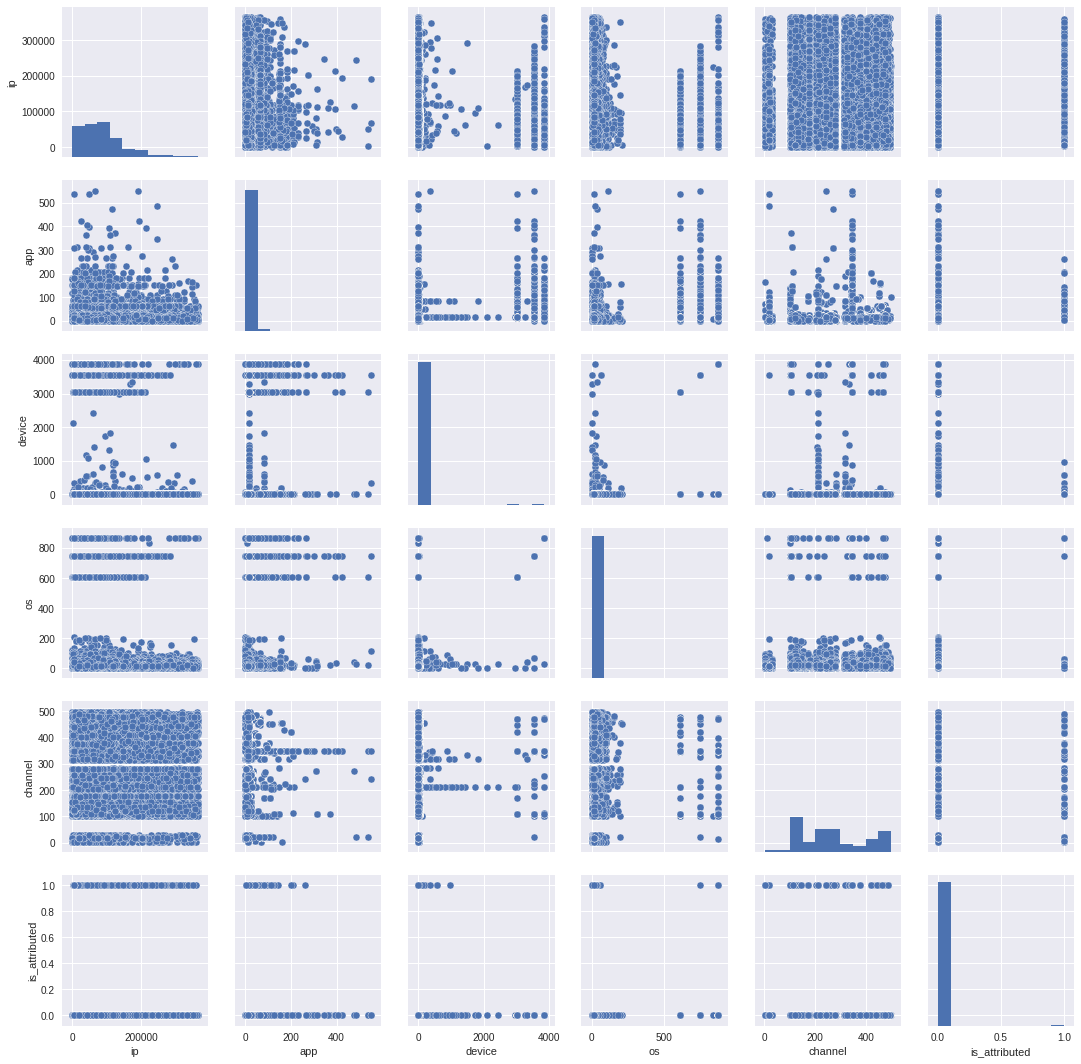

In [15]:
sns.pairplot(data_sample)

### II. Fitting Initial Baseline Model

In [0]:
# Linear Regression

# Try out decision trees?

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

NameError: ignored

### III. Models Comparison

The main models examined in this case will be

* RKDE: Robust Kernel Density Estimation
* OCSVM: One Class SVM
* LOF: Local Outlier Factor
* IFOR: Isolation Forest





#### RKDE: Robust Kernel Density Estimation

#### OCSVM: One Class SVM

#### LOF: Local Outlier Factor

#### IFOR: Isolation Forest

### IV. Model Application

### V. Complete and Validated Analysis


### VI. Data Visualization